In [1]:
import sys
sys.path.append('..')
from MPRA_exp.utils import *

In [3]:
os.chdir('../../data/GosaiMPRA')

In [2]:
df = pd.read_csv('supp_materials/SupTable 10 - CODA_paper_library.txt', sep='\t')

In [3]:
df

,ID,sequence,origin,target_cell,round,track_ID,K562_l2fc,HepG2_l2fc,SKNSH_l2fc,MinGap,K562_lfcSE,HepG2_lfcSE,SKNSH_lfcSE,K562_prediction,HepG2_prediction,SKNSH_prediction
0,20211207_63610__124703__1::sa__hepg2__0,TCGAAACAGGTATACCGCCAGCAATCCAATCTCTACCGGTGTACAC...,Simulated_Annealing,hepg2,0,NaN,-0.311911,2.196081,-0.917639,2.507992,0.172967,0.283926,0.348235,-1.470296,5.797530,-1.390143
1,20211207_63610__124703__4::sa__hepg2__0,GCTAAGGTCCTTATTGAATTTTGGTTAATCATTAACTACCCGTCAT...,Simulated_Annealing,hepg2,0,NaN,-1.110302,0.880661,-1.097117,1.977779,0.379151,0.224763,0.387839,-0.945908,5.258021,-0.792220
2,20211207_63610__124703__5::sa__hepg2__0,TGGTCCATTCCTGGGAATTTGCCGCCTGTACCTGCAAGGTTATACA...,Simulated_Annealing,hepg2,0,NaN,-0.545083,2.169025,-1.135171,2.714108,0.466518,0.328841,0.580014,-1.018296,5.671950,-0.911035
3,20211207_63610__124703__12::sa__hepg2__0,TCGGGAGATGTCAACACCTGTTGAGCTATTATGCCCTAGCCTGGTT...,Simulated_Annealing,hepg2,0,NaN,-0.769610,2.042634,-0.703300,2.745934,0.591487,0.265328,2.890125,-1.059856,5.068971,-1.219801
4,20211207_63610__124703__15::sa__hepg2__0,GACTTTGAACTCTGGACAGCAGAACAAATCACGGGAACCCTGTCAT...,Simulated_Annealing,hepg2,0,NaN,-0.654328,2.037279,-1.243780,2.691607,0.247053,0.267308,0.247788,-0.842918,6.010541,-0.930583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77152,ORF54316:2538:1300-1500,CTCGGAGTTCAAGAAAATCATCTCACACGGCCGTCTCAGACCCTTC...,control,NaN,0,NaN,-0.315267,0.591628,0.068697,NaN,0.384919,0.363142,0.275408,-0.158865,1.282273,-0.275202
77153,ORF53130:1455:400-600,GCAATCCTACCCAGACAGATGCAGACAGCGACCTGGTGGGGGATGT...,control,NaN,0,NaN,-0.134821,-0.359782,-0.022281,NaN,0.178379,0.261176,0.200300,-0.247987,-0.644892,-0.367910
77154,ORF55877:2391:1900-2100,CCTATGCTGCCTCCTATGCCCTTGTCATCATTGCCATTTTTGAGCT...,control,NaN,0,NaN,0.646673,0.489900,0.462366,NaN,0.259927,0.190735,0.111966,0.524327,0.483457,0.248783
77155,ORF52950:2193:400-600,AGCCACAACAAAACAGCCAGTTAATGTGGAAACAAGGTCGACAACT...,control,NaN,0,NaN,-0.061676,-0.014411,0.239693,NaN,0.171760,0.199712,0.166026,0.085746,0.563376,0.668541


In [4]:
df = df.rename(columns={'sequence':'seq', 'K562_l2fc': 'K562', 'HepG2_l2fc': 'HepG2', 'SKNSH_l2fc': 'SKNSH'})
df = df[['seq', 'origin', 'K562', 'HepG2', 'SKNSH']]

df = df[(df[['K562', 'HepG2', 'SKNSH']].notna()).all(axis=1)]
df = df[(df[['K562', 'HepG2', 'SKNSH']].abs() < 10).all(axis=1)]
df = df[(df['seq'].str.len() == 200)]
df = df.reset_index(drop=True)

In [5]:
df

,seq,origin,K562,HepG2,SKNSH
0,TCGAAACAGGTATACCGCCAGCAATCCAATCTCTACCGGTGTACAC...,Simulated_Annealing,-0.311911,2.196081,-0.917639
1,GCTAAGGTCCTTATTGAATTTTGGTTAATCATTAACTACCCGTCAT...,Simulated_Annealing,-1.110302,0.880661,-1.097117
2,TGGTCCATTCCTGGGAATTTGCCGCCTGTACCTGCAAGGTTATACA...,Simulated_Annealing,-0.545083,2.169025,-1.135171
3,TCGGGAGATGTCAACACCTGTTGAGCTATTATGCCCTAGCCTGGTT...,Simulated_Annealing,-0.769610,2.042634,-0.703300
4,GACTTTGAACTCTGGACAGCAGAACAAATCACGGGAACCCTGTCAT...,Simulated_Annealing,-0.654328,2.037279,-1.243780
...,...,...,...,...,...
76163,CTCGGAGTTCAAGAAAATCATCTCACACGGCCGTCTCAGACCCTTC...,control,-0.315267,0.591628,0.068697
76164,GCAATCCTACCCAGACAGATGCAGACAGCGACCTGGTGGGGGATGT...,control,-0.134821,-0.359782,-0.022281
76165,CCTATGCTGCCTCCTATGCCCTTGTCATCATTGCCATTTTTGAGCT...,control,0.646673,0.489900,0.462366
76166,AGCCACAACAAAACAGCCAGTTAATGTGGAAACAAGGTCGACAACT...,control,-0.061676,-0.014411,0.239693


In [6]:
df.to_csv('GosaiMPRA_designed.csv', index=False)

In [7]:
df_1 = pd.read_csv('GosaiMPRA_len200.csv')
df_2 = pd.read_csv('GosaiMPRA_designed.csv')
print(df_1.shape, df_2.shape)
df_1['origin'] = 'chr'
df_2['chr'] = 'chr0'
df_3 = pd.concat([df_1, df_2])
print(df_3.shape)
df_3.to_csv('GosaiMPRA_total.csv', index=False)
df_3

(763683, 5) (76168, 5)
(839851, 6)


,seq,chr,HepG2,K562,SKNSH,origin
0,CCTGGTCTTTCTTGCTAAATAAACATATCGTGCATCATCCAGATCT...,chr7,0.233601,0.060779,0.047194,chr
1,CATAAAGATGAGGCTTGGCAAAGAACATCTCTCGGTGCCTCCCATT...,chr1,0.004565,0.379639,-0.244395,chr
2,CATAAAGCCAATCACTGAGATGACAAGTACTGCCAGGAAAGAAGGC...,chr1,0.384537,0.036707,-0.004578,chr
3,CATAAAGGCAGTGTAGACCCAAACAGTGAGCAGTAGCAAGATTTAT...,chr15,4.116494,4.508784,3.040183,chr
4,CATAAAGGGCTGAACATGCTGTTGAAAAAATGTAGATATAAAAGTT...,chr12,1.423444,1.616602,1.335892,chr
...,...,...,...,...,...,...
76163,CTCGGAGTTCAAGAAAATCATCTCACACGGCCGTCTCAGACCCTTC...,chr0,0.591628,-0.315267,0.068697,control
76164,GCAATCCTACCCAGACAGATGCAGACAGCGACCTGGTGGGGGATGT...,chr0,-0.359782,-0.134821,-0.022281,control
76165,CCTATGCTGCCTCCTATGCCCTTGTCATCATTGCCATTTTTGAGCT...,chr0,0.489900,0.646673,0.462366,control
76166,AGCCACAACAAAACAGCCAGTTAATGTGGAAACAAGGTCGACAACT...,chr0,-0.014411,-0.061676,0.239693,control


In [9]:
df_3 = pd.merge(df_1, df_2, how='inner', on='seq')
df_3

,seq,chr_x,HepG2_x,K562_x,SKNSH_x,origin_x,origin_y,K562_y,HepG2_y,SKNSH_y,chr_y
0,CATAAAGAAAGAAGATTGGACAGTAAATTGTGGTTCCTTTATACAA...,chr5,0.208423,0.399077,-0.229079,chr,control,0.433349,-0.030614,-0.096805,chr0
1,CATAAATGTATATGCTCACATTTGTAAAACTATCTAACATCTTATT...,chr5,0.529239,0.416030,0.349565,chr,control,0.351460,0.617072,0.410475,chr0
2,CATAAAAATTTCAACTTGAAGTGTATCTCCCAGAATTTTCATGTGT...,chr11,5.918748,6.399570,6.499800,chr,control,5.979942,4.132069,6.068159,chr0
3,CATAATTATGAAAAATGCTTAGAGTATTCTTGTATTTATAGTTTTC...,chr14,0.218524,0.192089,0.227382,chr,control,0.134207,0.121131,0.237267,chr0
4,CAGTTTCAGTATTGGATTTTCTCTCTTTCTTGTACTGATGTTCTTT...,chr4,0.461161,0.136861,0.262500,chr,control,0.227556,0.619772,1.107433,chr0
...,...,...,...,...,...,...,...,...,...,...,...
595,CCTTGGAGTCTGAGTTGGCACTTTCTTCCCTGATGATTCTTTGATA...,chr3,3.511782,-0.076727,-0.680638,chr,Malinois_natural,-0.002691,3.050951,-0.162791,chr0
596,ACCCAGCTGTCCCTCAGAATGAGTGTGTTCACTGGAGGAGGTGACA...,chr10,3.693274,-0.453796,-0.496922,chr,Malinois_natural,-0.201825,2.880101,-0.472145,chr0
597,CTTCTGTCATTGTACTAGTTGGGAGTCCTGTCAATTCCAGGTCTTG...,chr3,1.590484,4.428495,1.204257,chr,DHS_natural,4.028113,1.742743,1.445707,chr0
598,TATGATCACCACTGCACTCCAGCCTGAGTGACAGAGACAGACTTCA...,chr17,3.339913,-0.330066,0.316105,chr,DHS_natural,0.157666,3.191531,0.467937,chr0


(592, 11)


<Axes: xlabel='HepG2_x', ylabel='HepG2_y'>

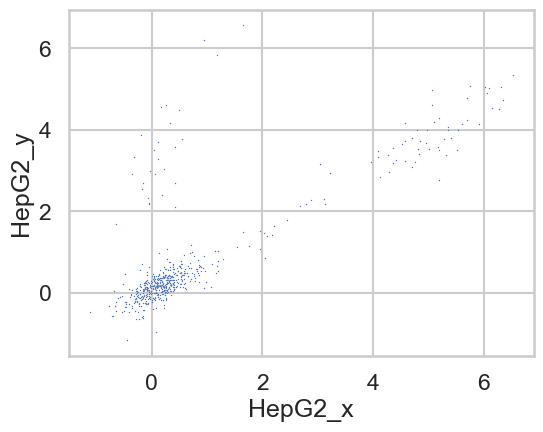

In [15]:
condition = (df_3['origin_y'] == 'control')
print(df_3[condition].shape)
x = df_3[condition]['HepG2_x']
y = df_3[condition]['HepG2_y']

pearson(x, y)
sns.scatterplot(x=x, y=y, s=1)

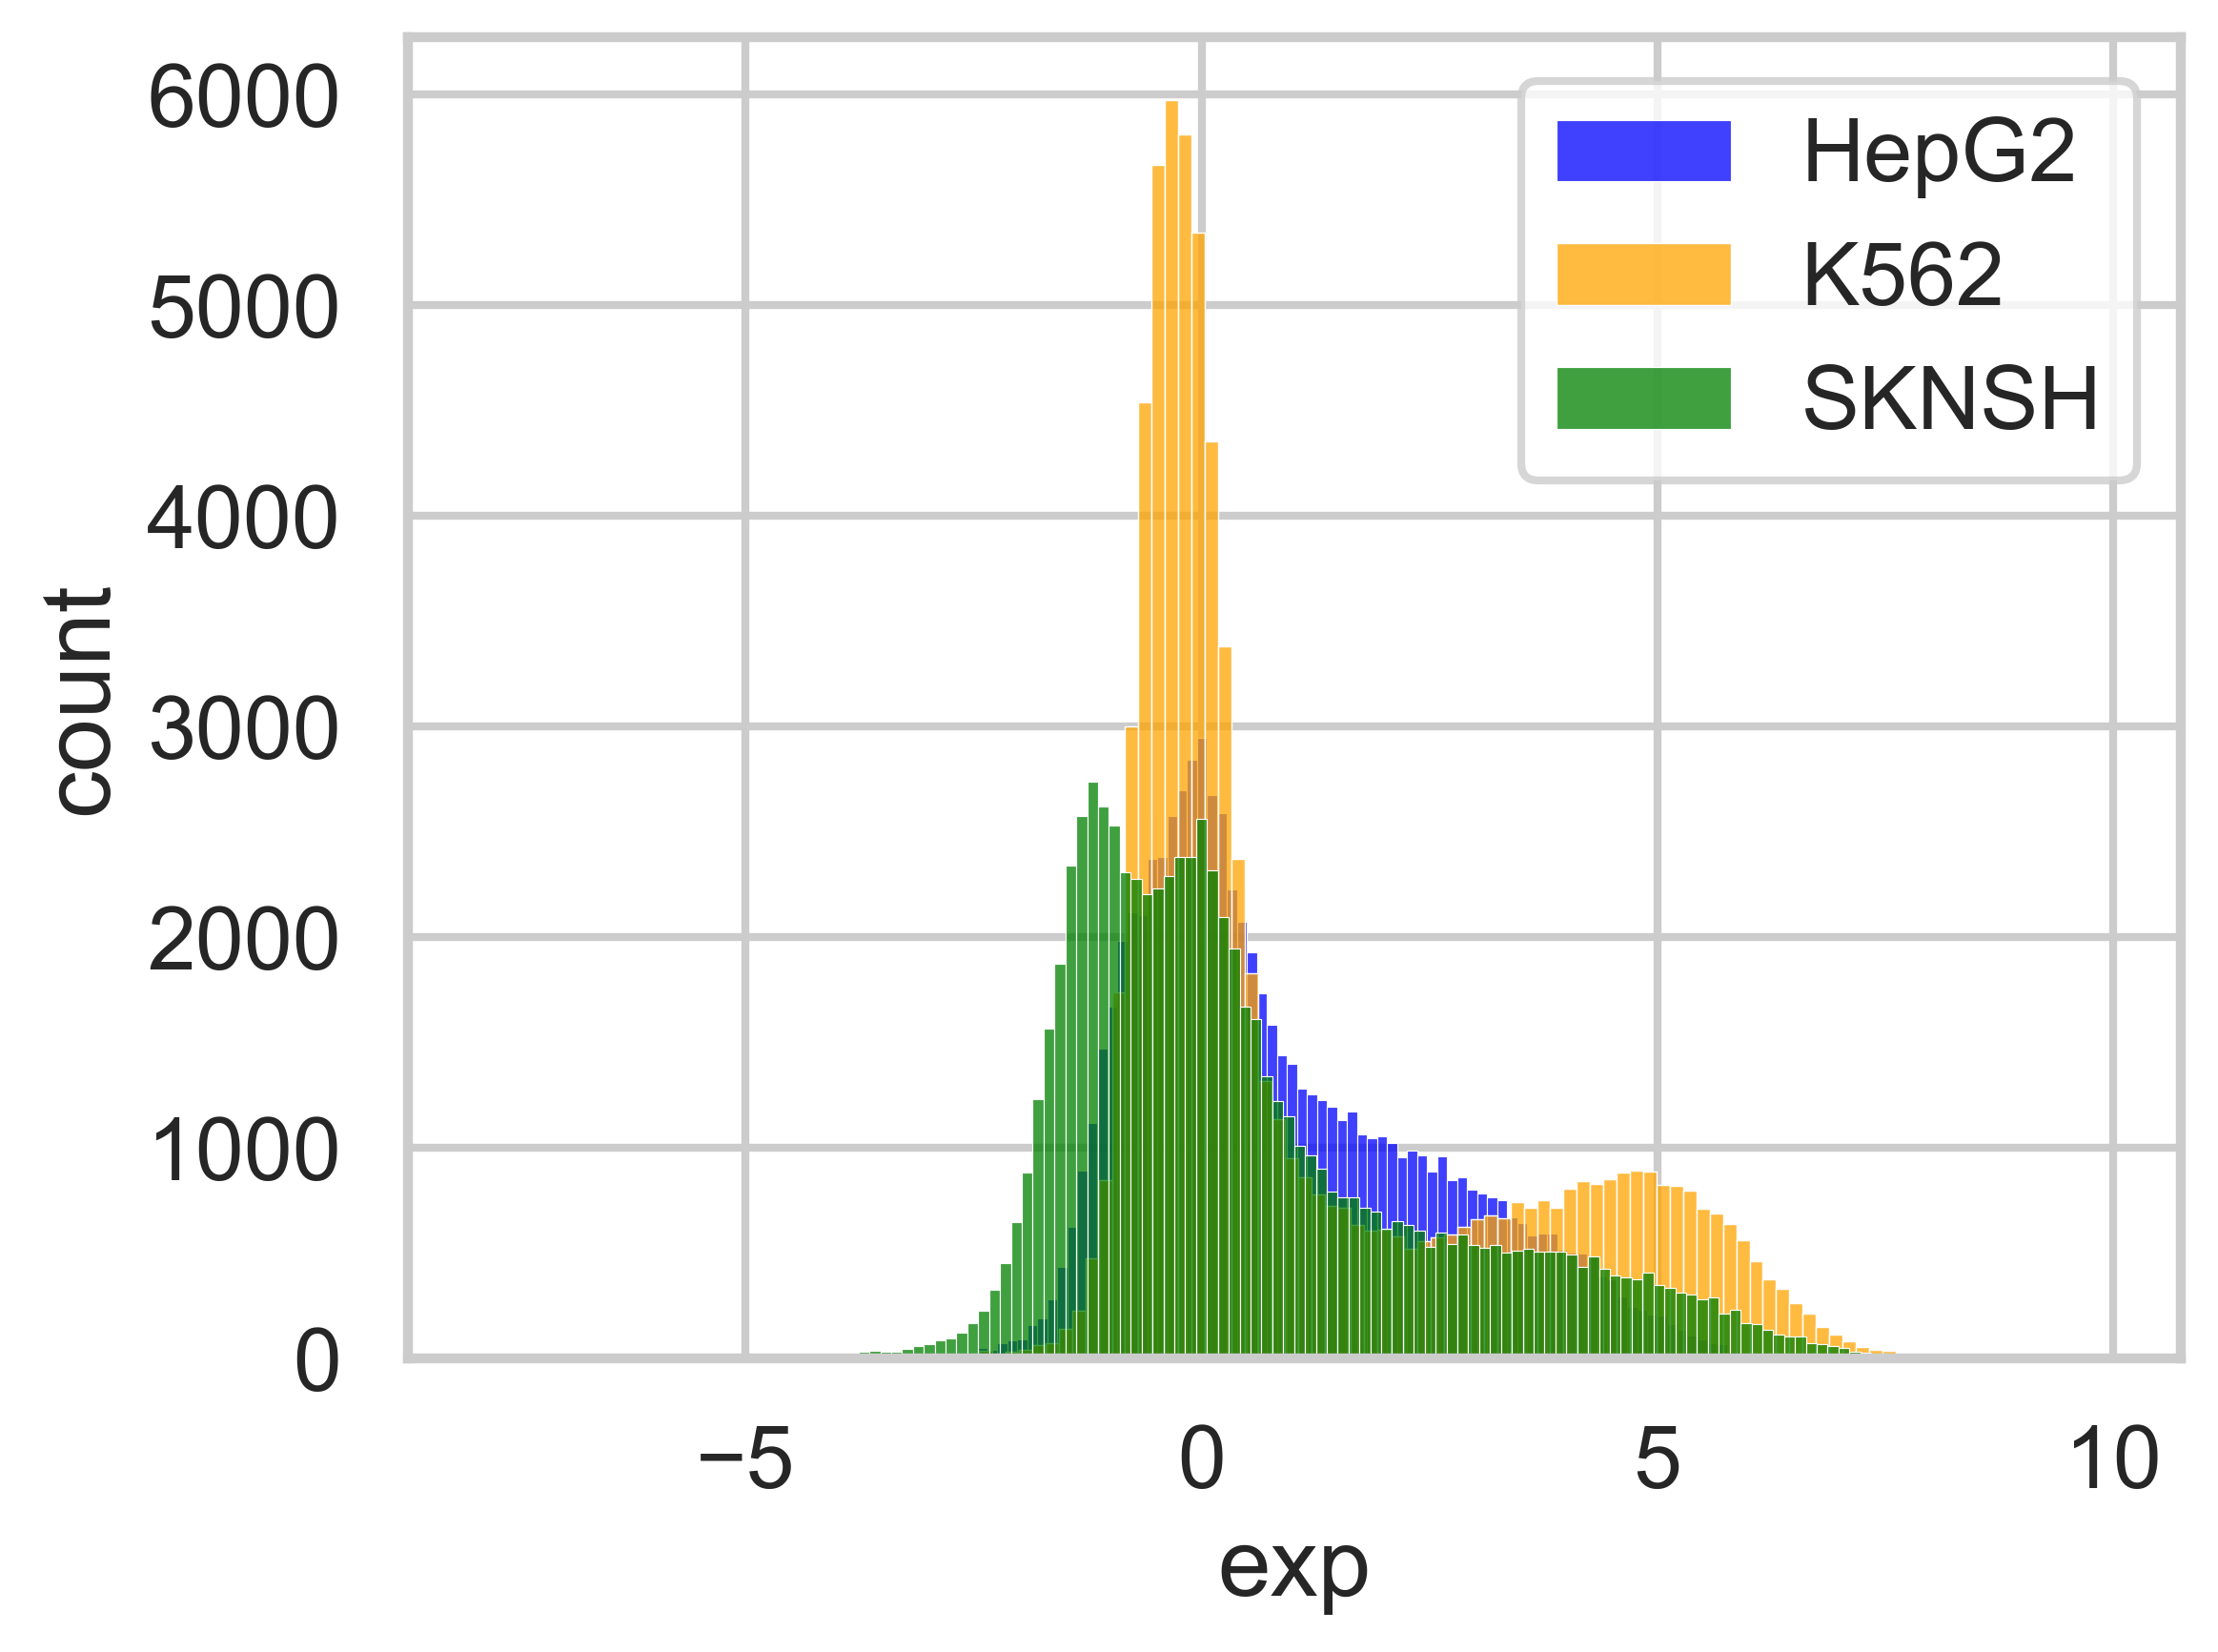

In [18]:
sns.histplot(data=df['HepG2'], color='blue')
sns.histplot(data=df['K562'], color='orange')
sns.histplot(data=df['SKNSH'], color='green')
plt.xlabel('exp')
plt.ylabel('count')
plt.legend(['HepG2', 'K562', 'SKNSH'])
plt.savefig('GosaiMPRA_designed_hist.png', dpi=300, bbox_inches='tight')

In [9]:
r = pearsonr(df['HepG2'], df['K562'])[0]
print(f'pearsonr = {r:.3f}')
r = pearsonr(df['HepG2'], df['SKNSH'])[0]
print(f'pearsonr = {r:.3f}')
r = pearsonr(df['SKNSH'], df['K562'])[0]
print(f'pearsonr = {r:.3f}')

pearsonr = -0.292
pearsonr = 0.123
pearsonr = -0.155


HepG2 K562 pearson r = -0.292
HepG2 SKNSH pearson r = 0.123
K562 SKNSH pearson r = -0.155


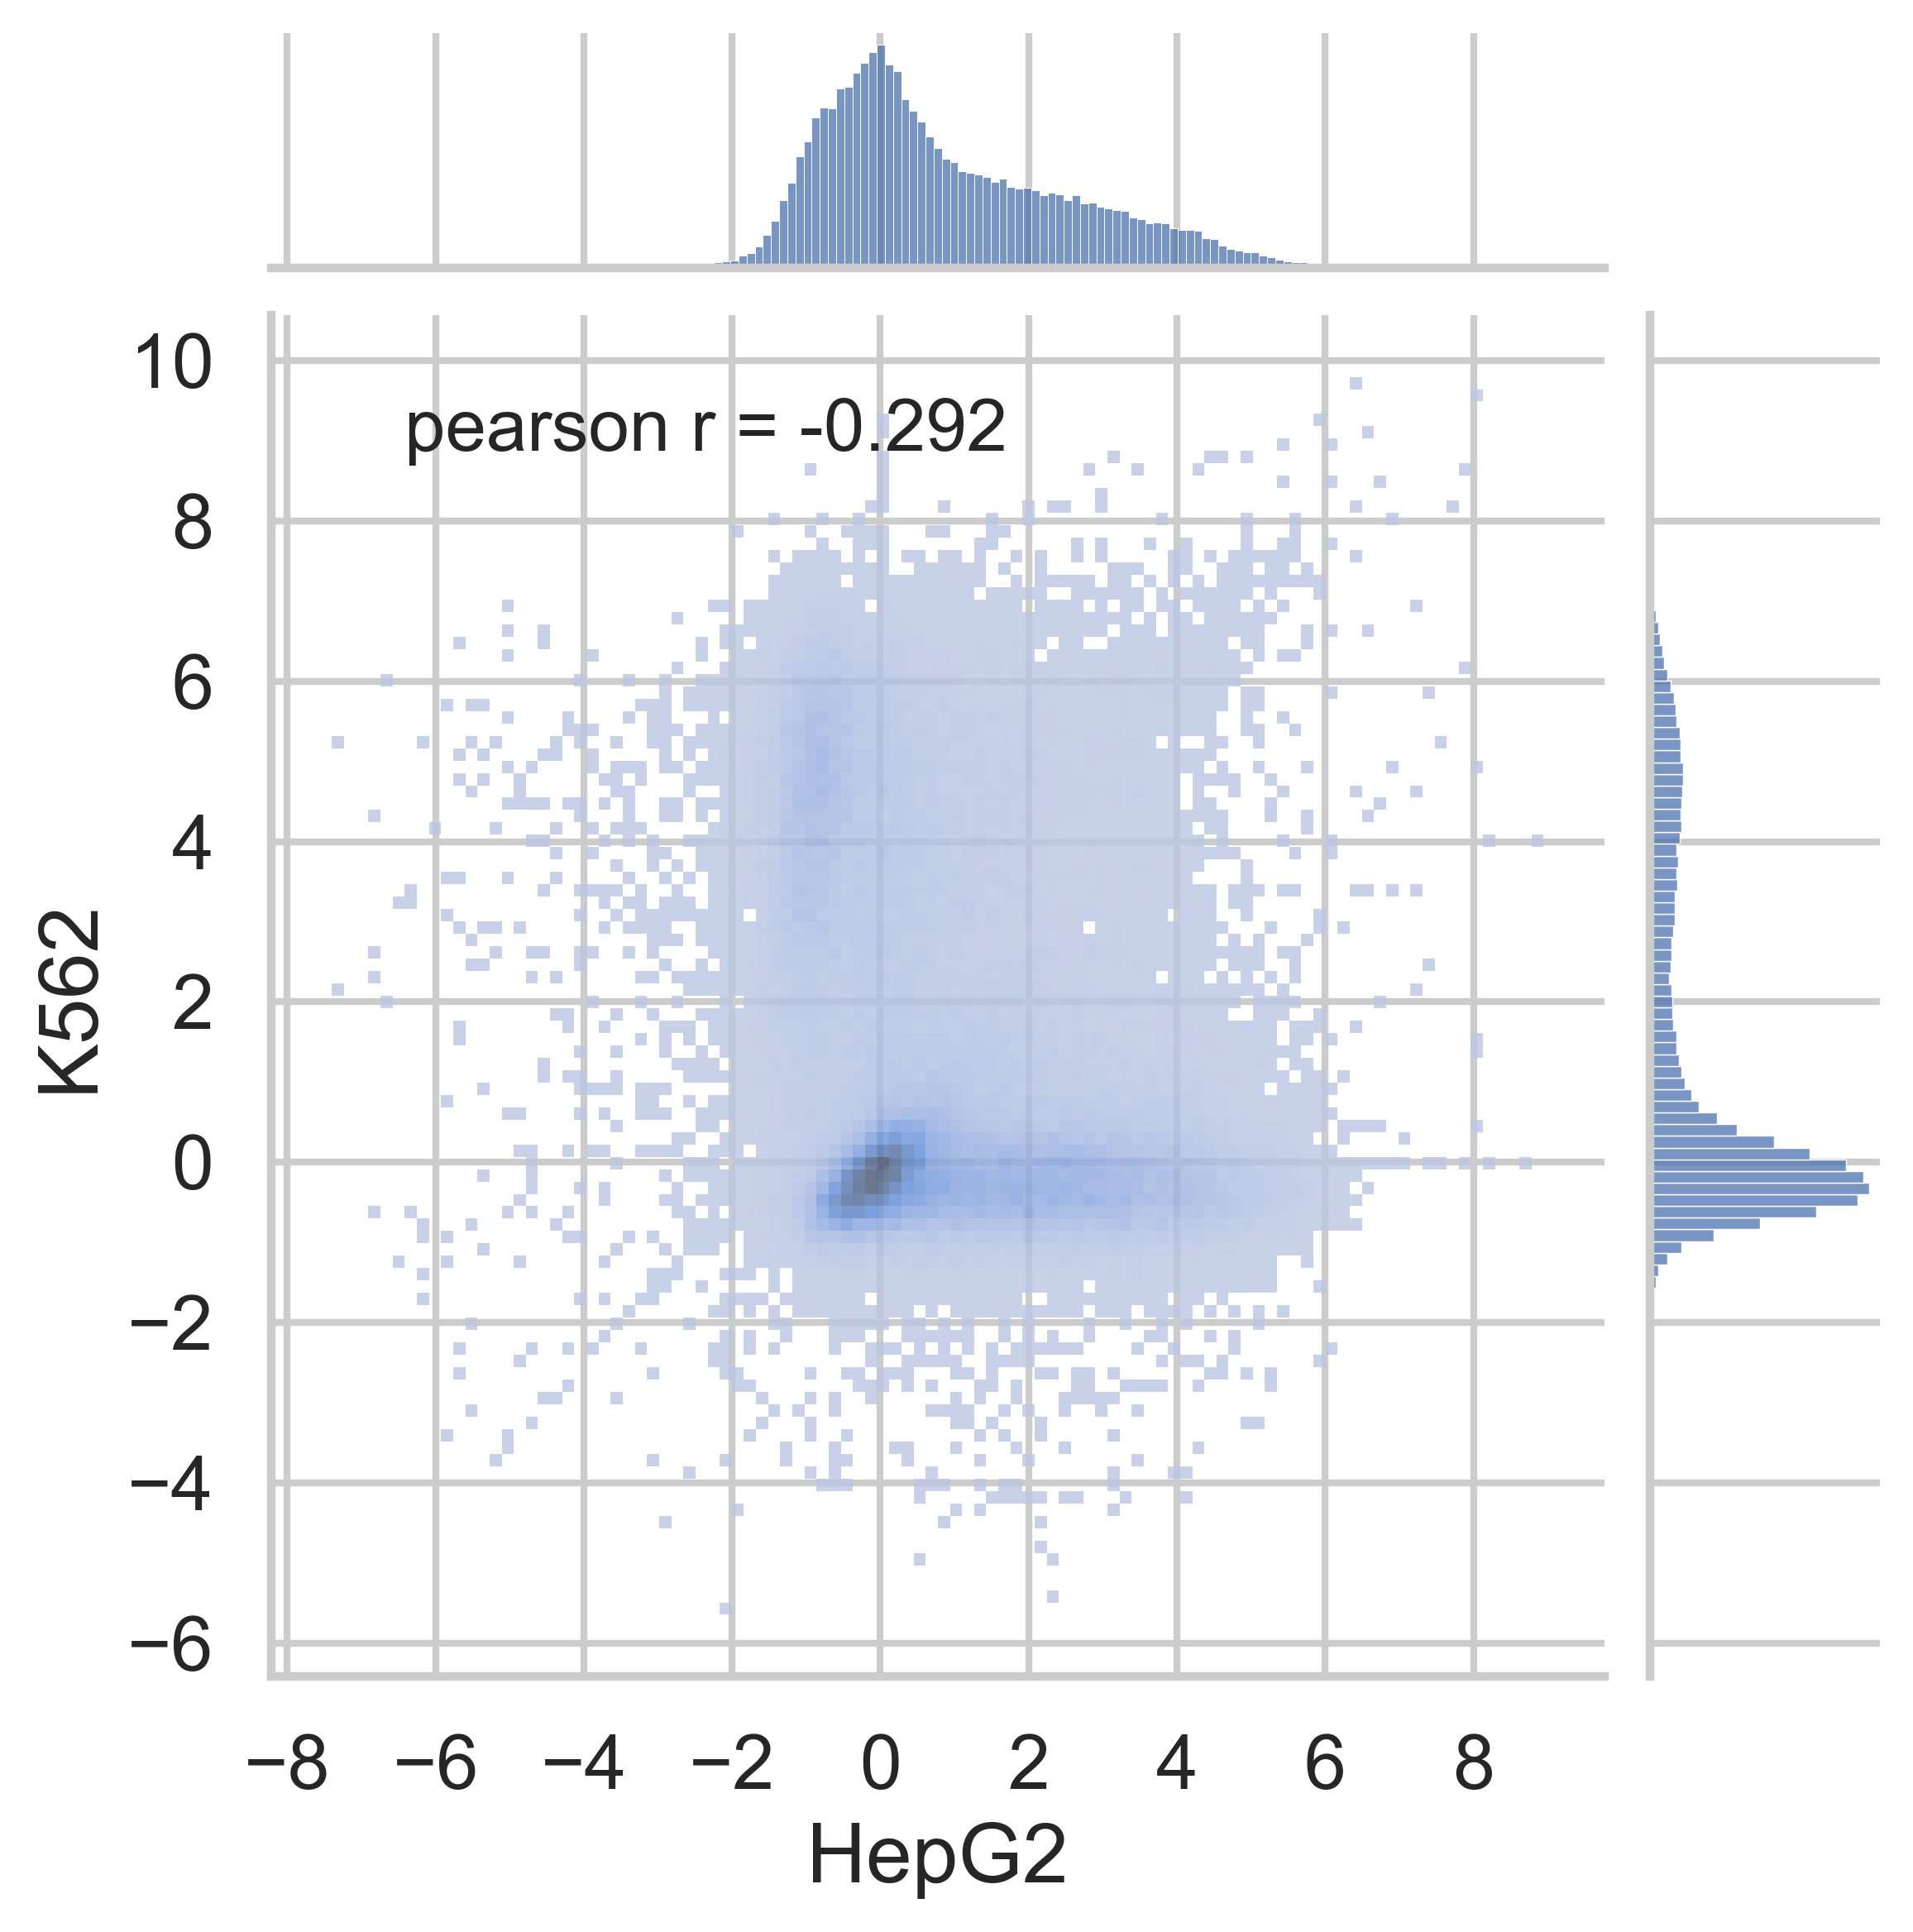

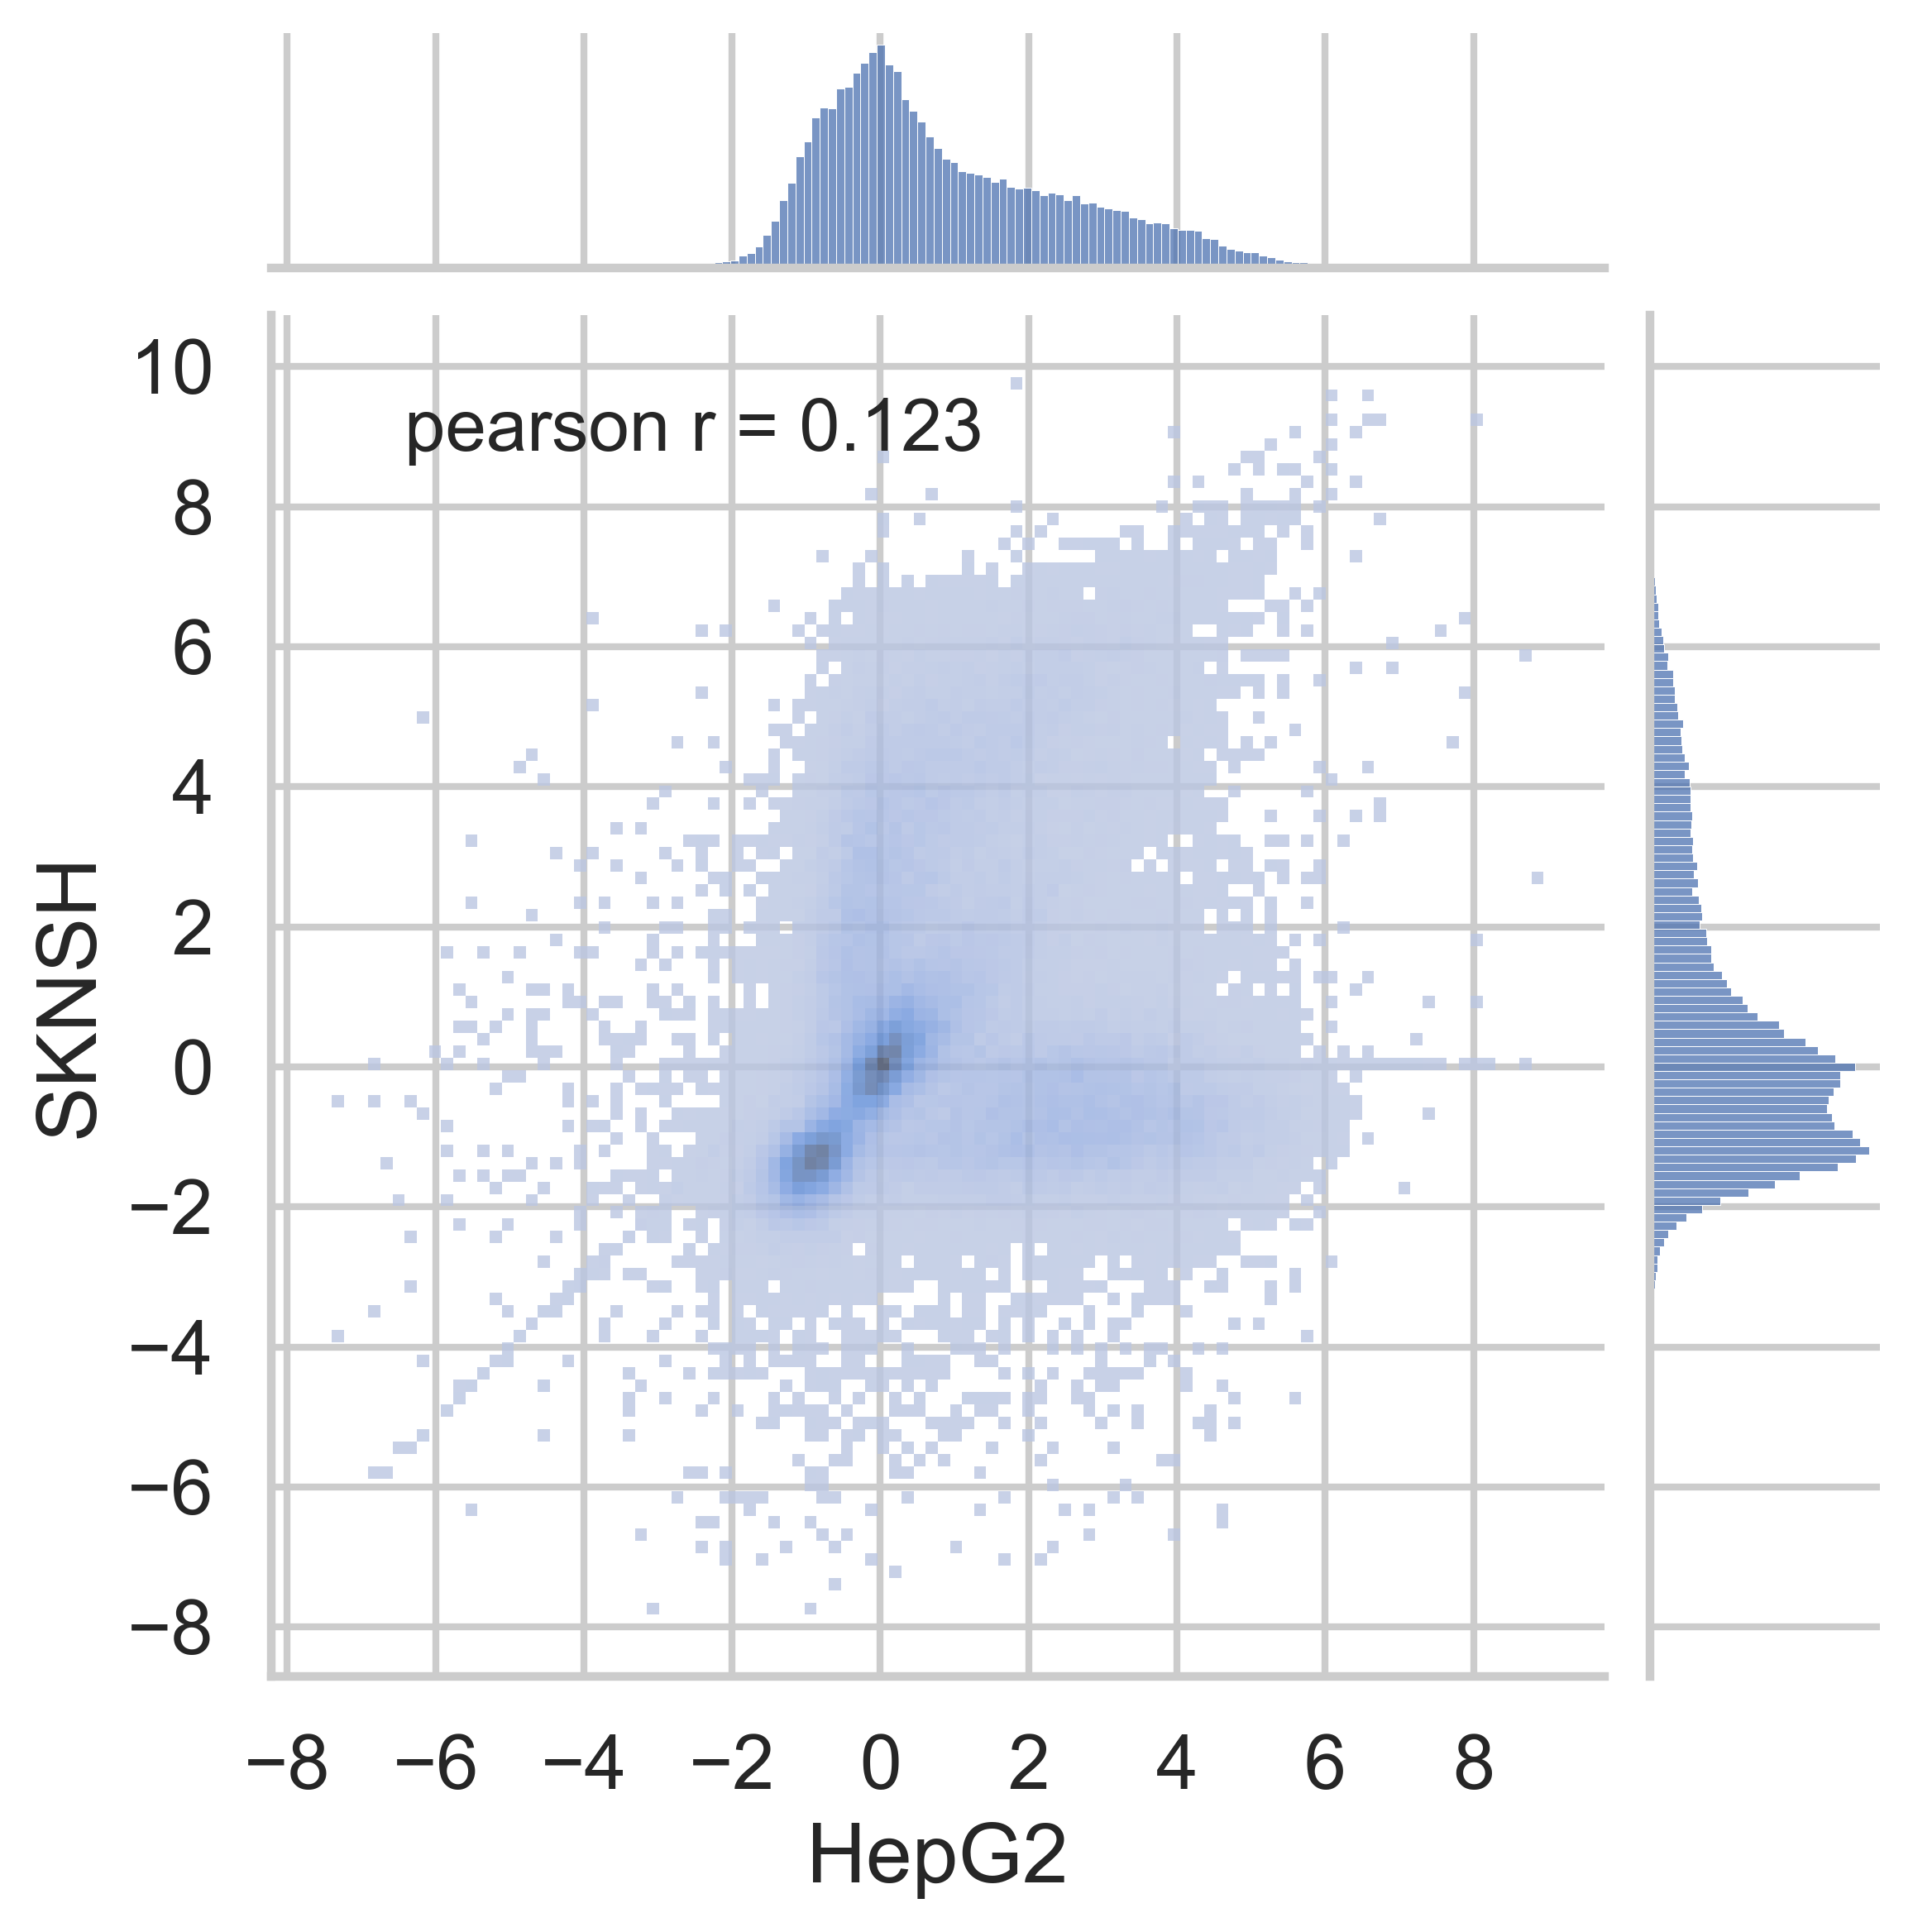

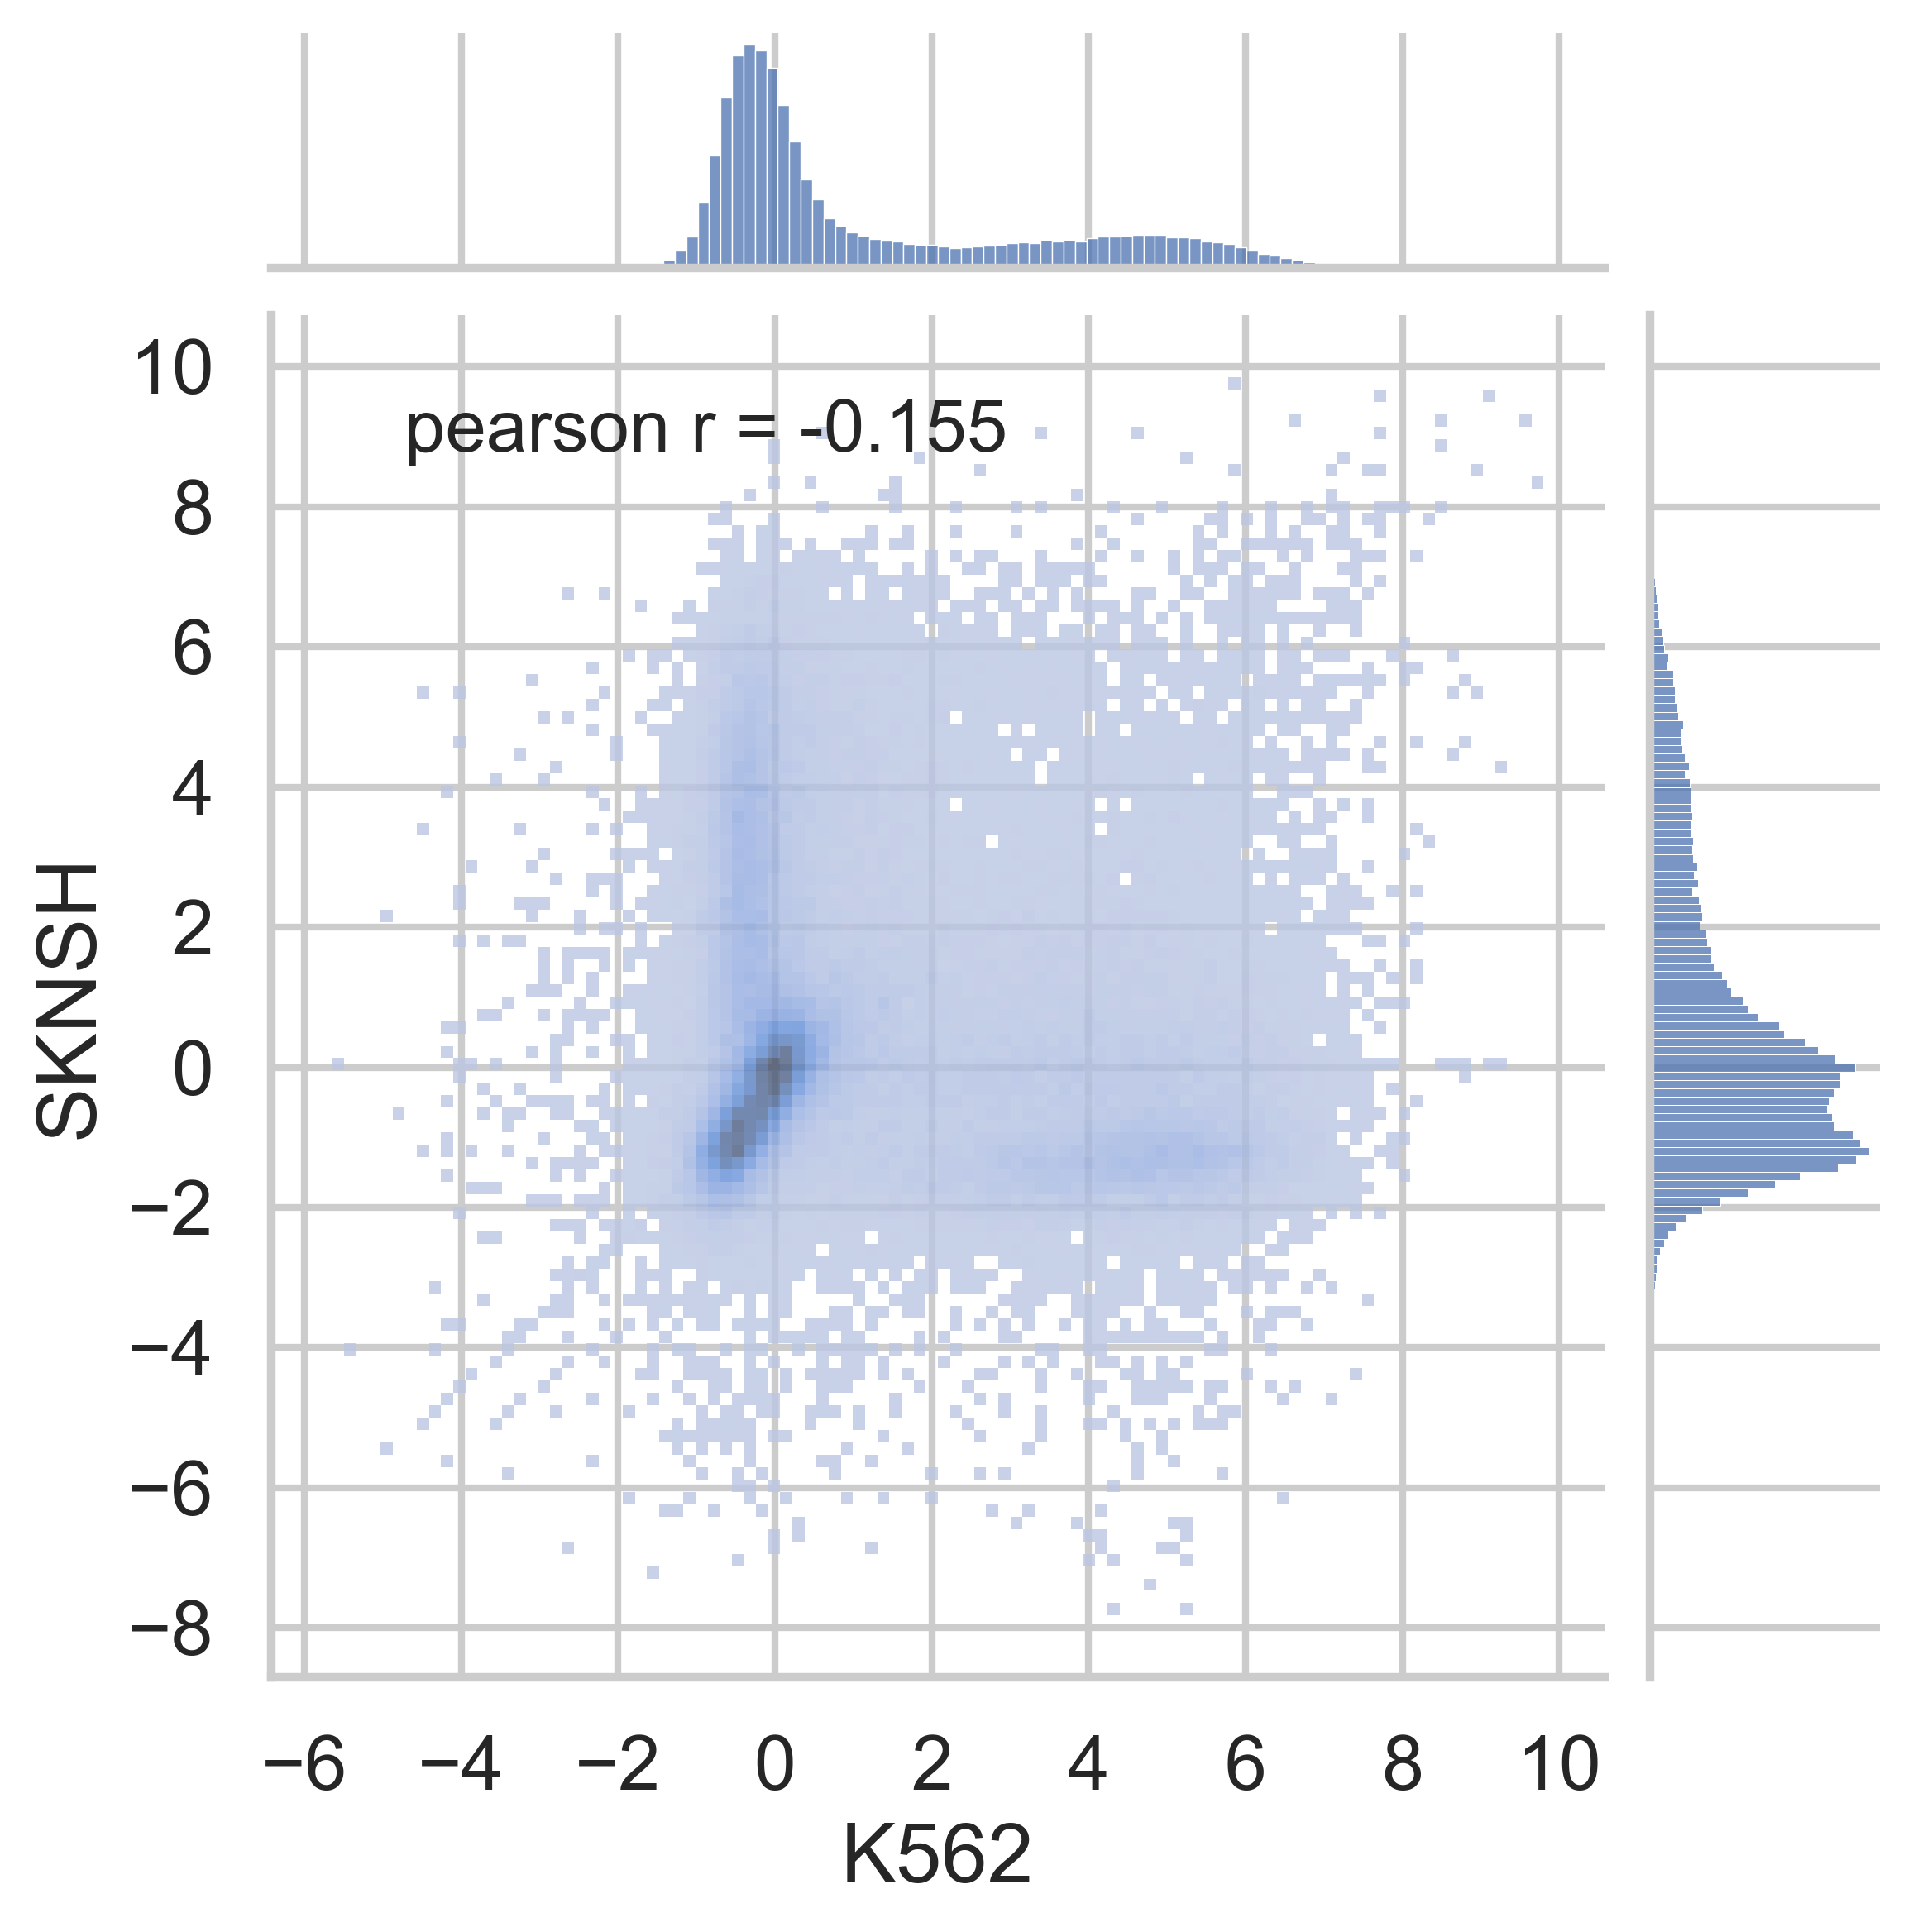

In [15]:
for cell_type_1, cell_type_2 in [('HepG2', 'K562'), ('HepG2', 'SKNSH'), ('K562', 'SKNSH')]:
    r = pearsonr(df[cell_type_1], df[cell_type_2])[0]
    print(f'{cell_type_1} {cell_type_2} pearson r = {r:.3f}')
    g = sns.jointplot(x=df[cell_type_1], y=df[cell_type_2], kind='hist', bins=100, alpha=0.8)
    g.fig.set_size_inches(6, 6)
    g.ax_joint.xaxis.set_major_locator(plt.MultipleLocator(2))
    g.ax_joint.yaxis.set_major_locator(plt.MultipleLocator(2))
    plt.text(0.1, 0.9, f'pearson r = {r:.3f}', transform=g.ax_joint.transAxes, fontsize=16)
    plt.savefig(f'GosaiMPRA_designed_{cell_type_1}_{cell_type_2}.png', dpi=300, bbox_inches='tight')

In [39]:
df1 = df
print(len(df1))
r1 = pearsonr(df1['HepG2'], df1['K562'])[0]
r2 = pearsonr(df1['HepG2'], df1['SKNSH'])[0]
r3 = pearsonr(df1['SKNSH'], df1['K562'])[0]
r = (r1 + r2 + r3) / 3
print(f'pearsonr = {r:.3f}')


origins = ['control', 'DHS_natural', 'Malinois_natural', 'AdaLead', 'FastSeqProp', 'Simulated_Annealing']
for origin in origins:
    print(origin)
    df1 = df[df['origin'] == origin]
    print(len(df1))
    r1 = pearsonr(df1['HepG2'], df1['K562'])[0]
    r2 = pearsonr(df1['HepG2'], df1['SKNSH'])[0]
    r3 = pearsonr(df1['SKNSH'], df1['K562'])[0]
    r = (r1 + r2 + r3) / 3
    print(f'pearsonr = {r:.3f}')

76168
pearsonr = -0.108
control
2134
pearsonr = 0.774
DHS_natural
11608
pearsonr = 0.481
Malinois_natural
11684
pearsonr = 0.143
AdaLead
11921
pearsonr = -0.309
FastSeqProp
26889
pearsonr = -0.223
Simulated_Annealing
11932
pearsonr = -0.300


In [4]:
df = pd.read_csv('GosaiMPRA_designed.csv', sep='\t')
df.to_csv('GosaiMPRA_designed.csv', index=False)

In [9]:
df[['HepG2_b', 'K562_b', 'SKNSH_b']] = (df[['HepG2', 'K562', 'SKNSH']] > 2).astype(int)

In [10]:
df

,seq,origin,K562,HepG2,SKNSH,HepG2_b,K562_b,SKNSH_b
0,TCGAAACAGGTATACCGCCAGCAATCCAATCTCTACCGGTGTACAC...,Simulated_Annealing,-0.311911,2.196081,-0.917639,1,0,0
1,GCTAAGGTCCTTATTGAATTTTGGTTAATCATTAACTACCCGTCAT...,Simulated_Annealing,-1.110302,0.880661,-1.097117,0,0,0
2,TGGTCCATTCCTGGGAATTTGCCGCCTGTACCTGCAAGGTTATACA...,Simulated_Annealing,-0.545083,2.169025,-1.135171,1,0,0
3,TCGGGAGATGTCAACACCTGTTGAGCTATTATGCCCTAGCCTGGTT...,Simulated_Annealing,-0.769610,2.042634,-0.703300,1,0,0
4,GACTTTGAACTCTGGACAGCAGAACAAATCACGGGAACCCTGTCAT...,Simulated_Annealing,-0.654328,2.037279,-1.243780,1,0,0
...,...,...,...,...,...,...,...,...
76163,CTCGGAGTTCAAGAAAATCATCTCACACGGCCGTCTCAGACCCTTC...,control,-0.315267,0.591628,0.068697,0,0,0
76164,GCAATCCTACCCAGACAGATGCAGACAGCGACCTGGTGGGGGATGT...,control,-0.134821,-0.359782,-0.022281,0,0,0
76165,CCTATGCTGCCTCCTATGCCCTTGTCATCATTGCCATTTTTGAGCT...,control,0.646673,0.489900,0.462366,0,0,0
76166,AGCCACAACAAAACAGCCAGTTAATGTGGAAACAAGGTCGACAACT...,control,-0.061676,-0.014411,0.239693,0,0,0


In [11]:
df.to_csv('GosaiMPRA_designed.csv', index=False)